<a href="https://colab.research.google.com/github/ridwanbello/prosper_loan_analysis/blob/explanatory_analysis/Part_II_slide_deck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part II - Explanatory Analysis
## Factors determining Loan Completion
## by (Ridwan Oluwaseun Bello)



## Investigation Overview

In this investigation, I wanted to look at the most significant factors that contribute to completion of loans by borrowers. The main focus was on the Term, LoanStatus, BorrowerAPR, BankcardUtilization, EmploymentStatus, StatedMonthlyIncome, and ProsperScore.


## Dataset Overview

The prosper dataset consists of 113, 937 records of loan data in the dataset with 81 features. Most variables are numeric with 50 of them being floating data type and 11 of integer data type. 3 of them are Boolean and 17 of them are strings. 29,084 data points were removed from the analysis due to missing information.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [ ]:
## Data Cleaning

# Replacing the missing .02% in BorrowerAPR column with the mean of the borrower_fees since borrower_fees = borrowerAPR - borrowerRate
borrower_fees = loans["BorrowerAPR"] - loans["BorrowerRate"]
borrower_fees.median()
loans["BorrowerAPR"].fillna(loans["BorrowerRate"] + borrower_fees.median(), inplace=True)

loans["BorrowerAPR"].isnull().sum()

# There is a long tail in the distribution so lets replace columns related to default with "defaulted"
loans["LoanStatus"].replace(dict.fromkeys(['Chargedoff','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'], 'Defaulted'), inplace=True)
# Also replacing column similar to completion to "Completed"
loans["LoanStatus"].replace(dict.fromkeys(['FinalPaymentInProgress','Cancelled'], 'Completed'), inplace=True)

# Dropping null rows in ProsperScore
loans.dropna(subset=['ProsperScore'], inplace=True)

loans["ProsperScore"].isnull().sum()

0

## (Distribution of Loan Status)
Distribution of Loan Status

This shows the distribution of our target variable, the current status of the loan which consists of Current, Completed and Cancelled.


Text(0,0.5,'Frequency')

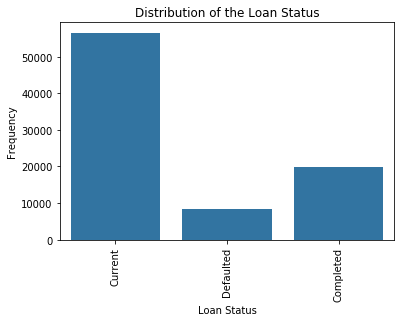

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'LoanStatus', color = default_color)
ax.set_title("Distribution of the Loan Status")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_xlabel("Loan Status")
ax.set_ylabel("Frequency")

## (Distribution of Borrower's Stated Monthly Income)

The statedmonthlyincome ranges from 0 to over 120,000 dollars but peaked in the amount between 60,000 and 70,000 dollars which follows a normal distribution curve.

[]

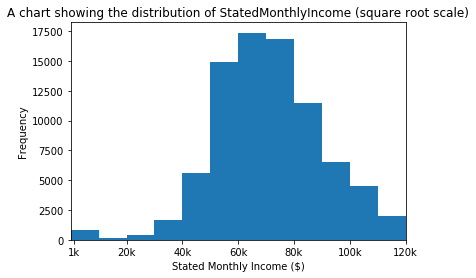

In [ ]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(loans['StatedMonthlyIncome'].max())+10, 10)
plt.hist(loans['StatedMonthlyIncome'].apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(loans['StatedMonthlyIncome'].max())+10, 10)
plt.xlim(0, 100)
plt.xticks([1, 20, 40, 60, 80, 100, 120], ['1k', '20k', '40k', '60k', '80k', '100k', '120k'])
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Frequency')
plt.title('A chart showing the distribution of StatedMonthlyIncome (square root scale)')
plt.plot()

## (Loan Status vs. StatedMonthlyIncome)

It can be deduced that the higher the statedmonthlyincome, the lower the defaulted loans which means statedmonthlyincome can be a strong determining factor.


Text(0,0.5,'Loan Status')

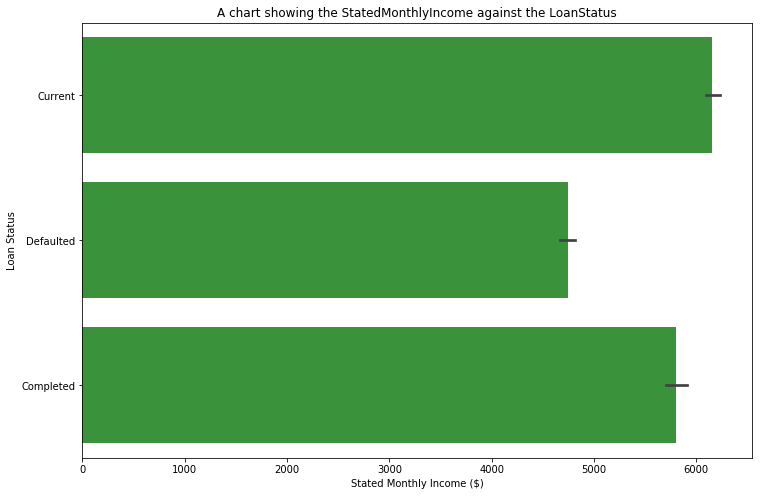

In [ ]:
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[2]
sb.barplot(x="StatedMonthlyIncome", y="LoanStatus", data=loans, color=base_color, orient="h")
plt.title("A chart showing the StatedMonthlyIncome against the LoanStatus")
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel("Loan Status")

## (Loan Status vs. ProsperScore)

The prosper score follows what looks like a normal distribution against the defaulted loans

Text(0,0.5,'Frequency')

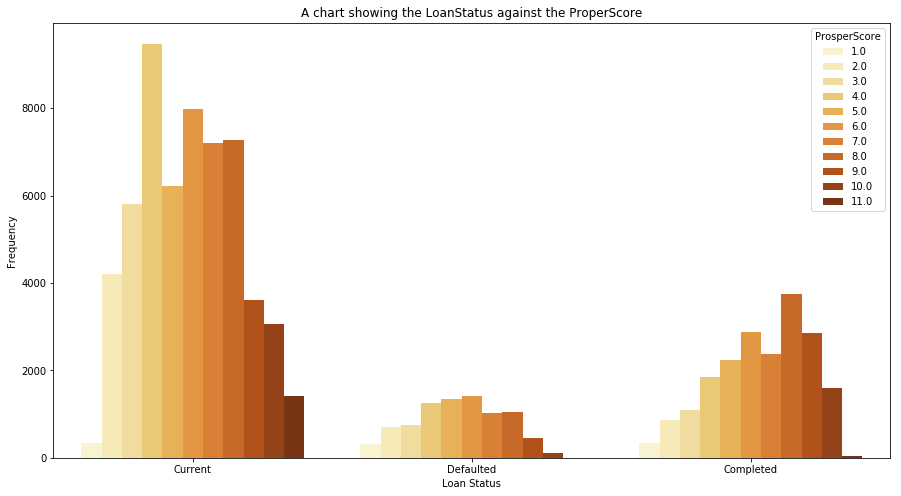

In [ ]:
plt.figure(figsize=(15,8))
sb.countplot(x="LoanStatus", hue="ProsperScore", data=loans, palette = 'YlOrBr')
plt.title("A chart showing the LoanStatus against the ProperScore")
plt.xlabel("Loan Status")
plt.ylabel('Frequency')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  